<img src="https://pages.cnpem.br/capsuladaciencia/wp-content/uploads/sites/155/2022/10/Ilum.png" alt="Ilum - Escola de Ciência" width="200"/>

**Redes Neurais e Algoritmos Genéticos 2025**

**Prof. Dr. Daniel R. Cassar**

Rafael Dalacorte Erdmann (24017)

## Fera Formidável 11: Eles estão se multiplicando!

**Objetivo:** Encontre o caminho de menor distância no problema do caixeiro viajante considerando que existe mais do que um caixeiro viajante.

**Considerações do experimento:** Considere um número n ≥ 10 de coordenadas (x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. Os caixeiros só andam em linha reta e apenas entre duas cidades. Todos os caixeiros começam em cidades diferentes e jamais visitam cidades já visitadas por outros caixeiros.

### Introdução

Assim como na Fera Formidável 10, aqui estamos lidando com um problema de caixeiro viajante [1], mas nesse caso são múltiplos caixeiros.

Por ser um problema NP difícil, seria necessário buscar todo o espaço dos possíveis trajetos para encontrar o trajeto perfeito. Porém para grandes números de cidades isso se torna rapidamente inviável de se calcular, o que nos motiva a utilizar algoritmos genéticos para encontrar um bom candidato para solucionar o problema.

### Resolução

Começamos importando as funções que serão utilizadas:

In [1]:
from pprint import pprint
from functools import partial
from itertools import permutations
from random import seed
from funcoes_feras import plota_cidades
from funcoes_feras import plota_trajeto_multiplos_caixeiros

from funcoes_feras import cria_cidades
from funcoes_feras import populacao_caixeiro as cria_populacao
from funcoes_feras import funcao_objetivo_pop_multiplos_caixeiros
from funcoes_feras import funcao_objetivo_multiplos_caixeiros
from funcoes_feras import selecao_torneio_min as funcao_selecao
from funcoes_feras import cruzamento_ordenado as funcao_cruzamento
from funcoes_feras import mutacao_troca as funcao_mutacao

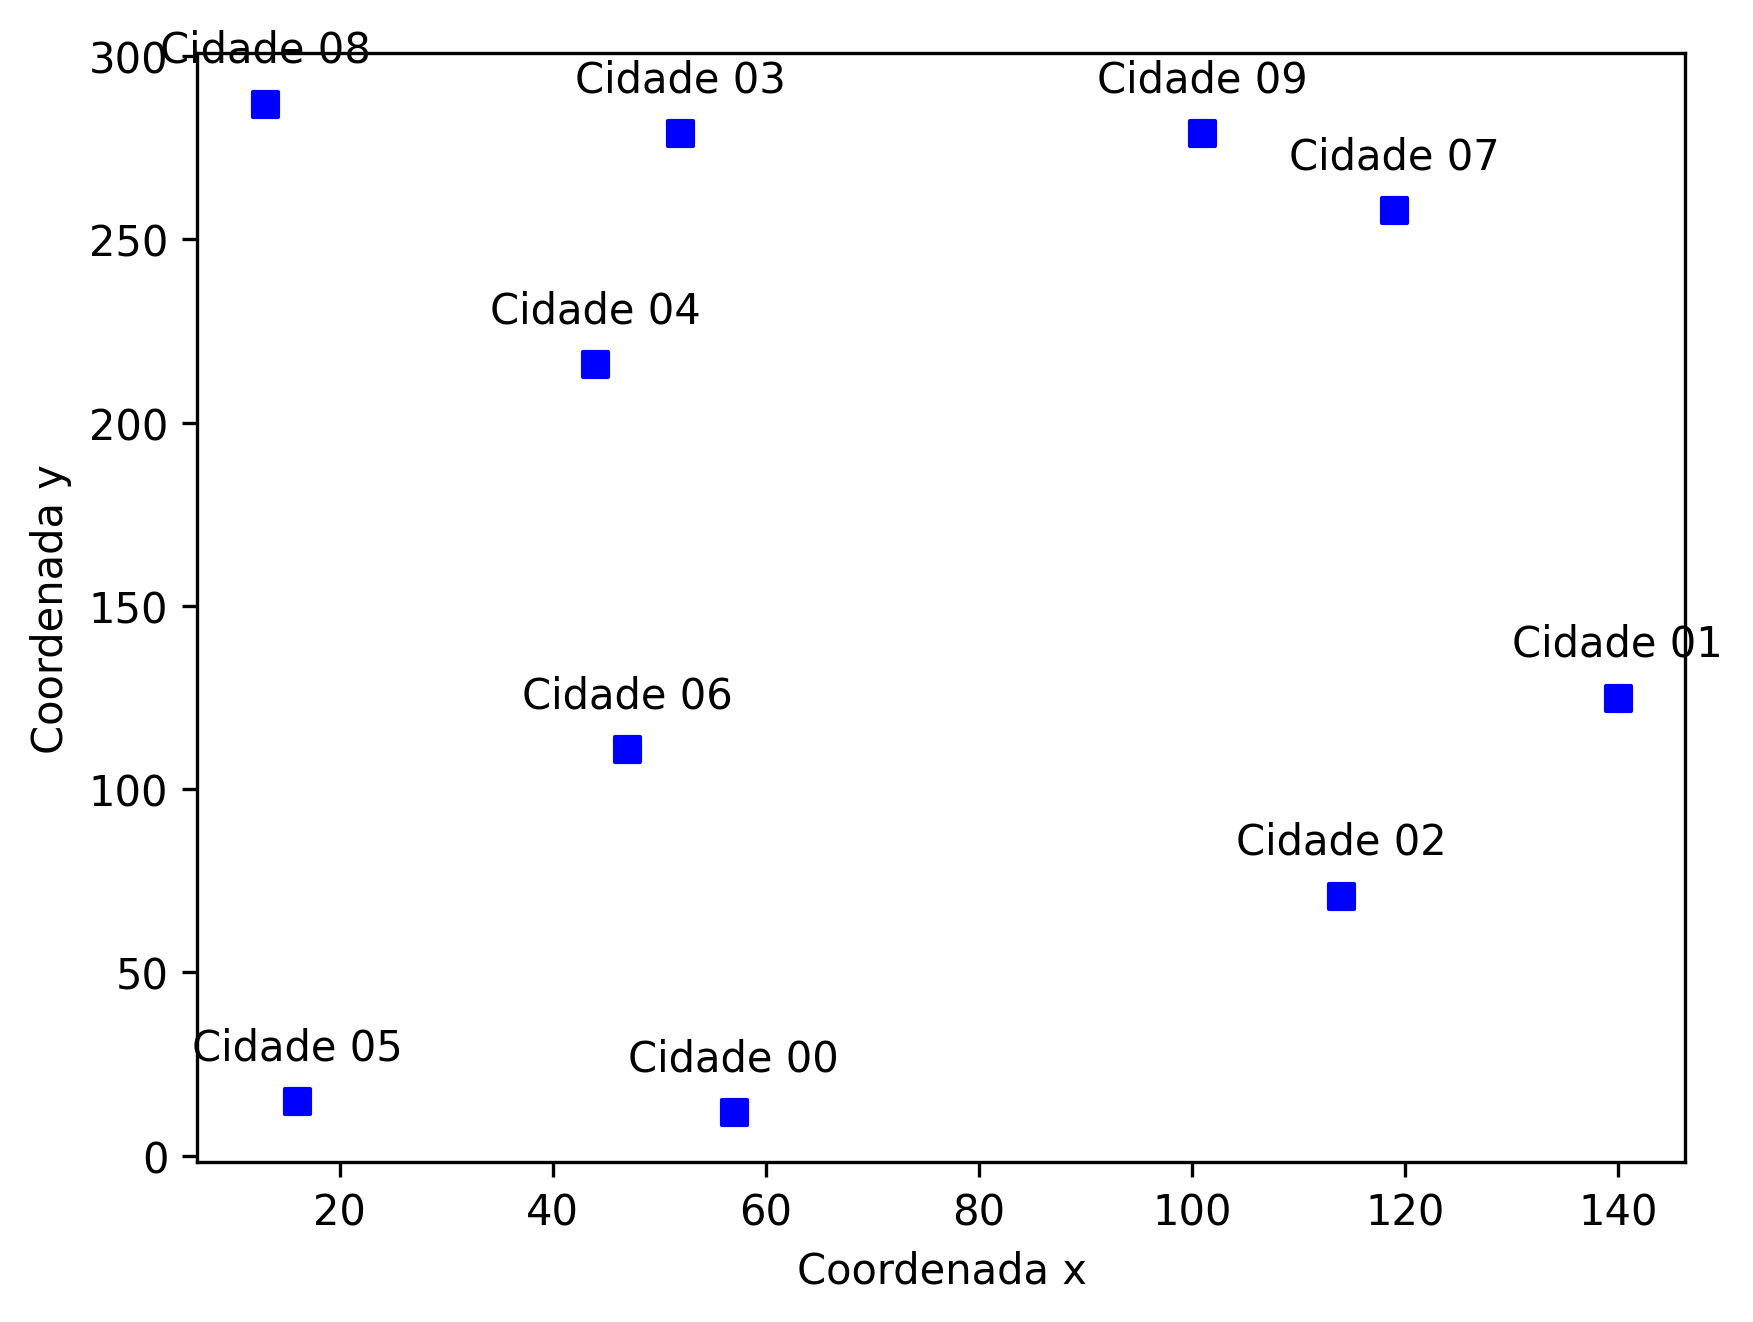

In [2]:
SEMENTE_ALEATORIA = 42
seed(SEMENTE_ALEATORIA)

NUM_CIDADES = 10
CIDADES = cria_cidades(NUM_CIDADES)

CAIXEIROS = 3

TAMANHO_POPULACAO = 100
NUM_GERACOES = 700
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.1
TAMANHO_TORNEIO = 3

plota_cidades(CIDADES)

Neste experimento, há menos limitações que na Fera 10: deve-se apenas ter um número de cidades $\geq$ 10 e ter-se que cada caixeiro não pode visitar uma cidade já previamente visitada por outro caixeiro ou ele mesmo. Com isso, utilizarei a mesma estrutura de dados do problema fundamental do caixeiro viajante: os candidatos serão uma lista com todas as cidades visitadas. Para isso, o código foi construído de maneira que a distância calculada e os plots ocorrem pulando cidades da lista, isso é, se tivermos dois caixeiros, o primeiro iniciou no índice 0 da lista e visita todos os índices pares, enquanto o segundo iniciou no índice 1 da lista e visita todos os índices ímpares.

Essa consideração foi realizada nas funções objetivo e na função `plota_trajeto`.

In [3]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
funcao_objetivo = partial(funcao_objetivo_pop_multiplos_caixeiros, cidades=CIDADES, n=CAIXEIROS)

pprint(populacao)

[['Cidade 06',
  'Cidade 03',
  'Cidade 07',
  'Cidade 04',
  'Cidade 02',
  'Cidade 00',
  'Cidade 01',
  'Cidade 05',
  'Cidade 08',
  'Cidade 09'],
 ['Cidade 04',
  'Cidade 02',
  'Cidade 03',
  'Cidade 06',
  'Cidade 08',
  'Cidade 00',
  'Cidade 09',
  'Cidade 01',
  'Cidade 07',
  'Cidade 05'],
 ['Cidade 05',
  'Cidade 04',
  'Cidade 00',
  'Cidade 09',
  'Cidade 03',
  'Cidade 08',
  'Cidade 07',
  'Cidade 01',
  'Cidade 06',
  'Cidade 02'],
 ['Cidade 09',
  'Cidade 05',
  'Cidade 03',
  'Cidade 08',
  'Cidade 00',
  'Cidade 06',
  'Cidade 01',
  'Cidade 07',
  'Cidade 04',
  'Cidade 02'],
 ['Cidade 01',
  'Cidade 06',
  'Cidade 04',
  'Cidade 03',
  'Cidade 05',
  'Cidade 02',
  'Cidade 09',
  'Cidade 08',
  'Cidade 07',
  'Cidade 00'],
 ['Cidade 04',
  'Cidade 01',
  'Cidade 02',
  'Cidade 09',
  'Cidade 05',
  'Cidade 08',
  'Cidade 06',
  'Cidade 03',
  'Cidade 07',
  'Cidade 00'],
 ['Cidade 08',
  'Cidade 03',
  'Cidade 05',
  'Cidade 06',
  'Cidade 00',
  'Cidade 01',
  'C

Para essa solução, não houve necessidade de alterar os operadores de cruzamento nem de mutação, de modo que as gerações seguem normalmente:

In [4]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
['Cidade 03', 'Cidade 06', 'Cidade 00', 'Cidade 07', 'Cidade 04', 'Cidade 02', 'Cidade 09', 'Cidade 01', 'Cidade 05', 'Cidade 08'] com distância: 793.4322686662014



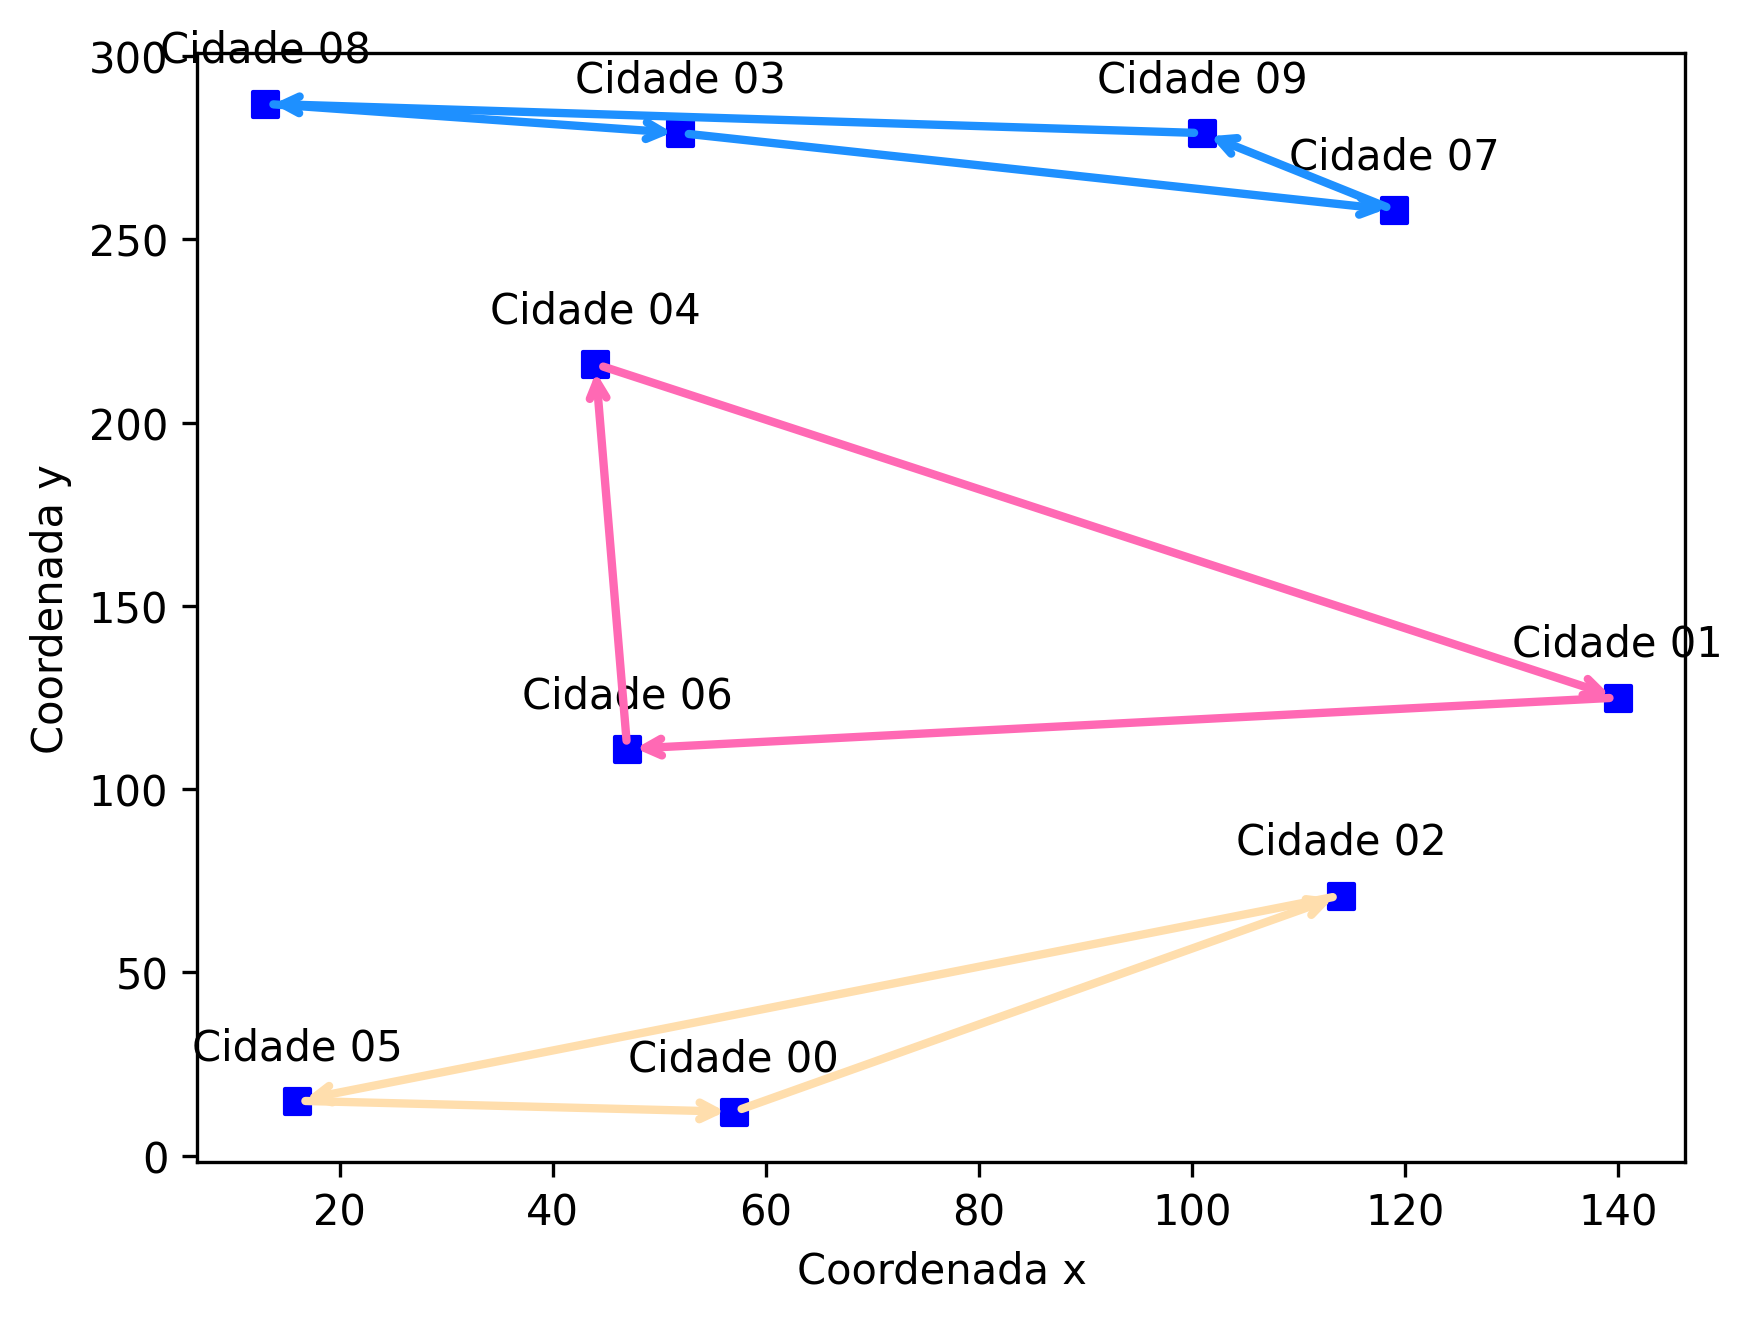

In [6]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_multiplos_caixeiros(melhor_individuo_observado, CIDADES, CAIXEIROS)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto_multiplos_caixeiros(CIDADES, melhor_individuo_observado, CAIXEIROS)

In [7]:
from funcoes_feras import dist_euclidiana

sum([dist_euclidiana(CIDADES["Cidade 00"], CIDADES["Cidade 04"]),
     dist_euclidiana(CIDADES["Cidade 04"], CIDADES["Cidade 06"]),
     dist_euclidiana(CIDADES["Cidade 06"], CIDADES["Cidade 05"]),
     dist_euclidiana(CIDADES["Cidade 05"], CIDADES["Cidade 00"]),
     0,
     dist_euclidiana(CIDADES["Cidade 01"], CIDADES["Cidade 07"]),
     dist_euclidiana(CIDADES["Cidade 07"], CIDADES["Cidade 02"]),
     dist_euclidiana(CIDADES["Cidade 02"], CIDADES["Cidade 01"]),])

833.0951898118315

Observamos, então, que com esse algoritmo chegamos em uma resposta boa dentro de 2 segundos. Em todos os casos, o algoritmo acaba separando as cidades em agrupamentos que minimizam a distância percorrida por cada caixeiro.

Se considerarmos um número baixo de cidades, ainda podemos realizar busca exaustiva para checar se a resposta encontrada foi a melhor resposta possível do problema:


Melhor individuo obtido por busca exaustiva:
('Cidade 03', 'Cidade 00', 'Cidade 04', 'Cidade 07', 'Cidade 02', 'Cidade 06', 'Cidade 09', 'Cidade 05', 'Cidade 01', 'Cidade 08') com distância: 793.4322686662013



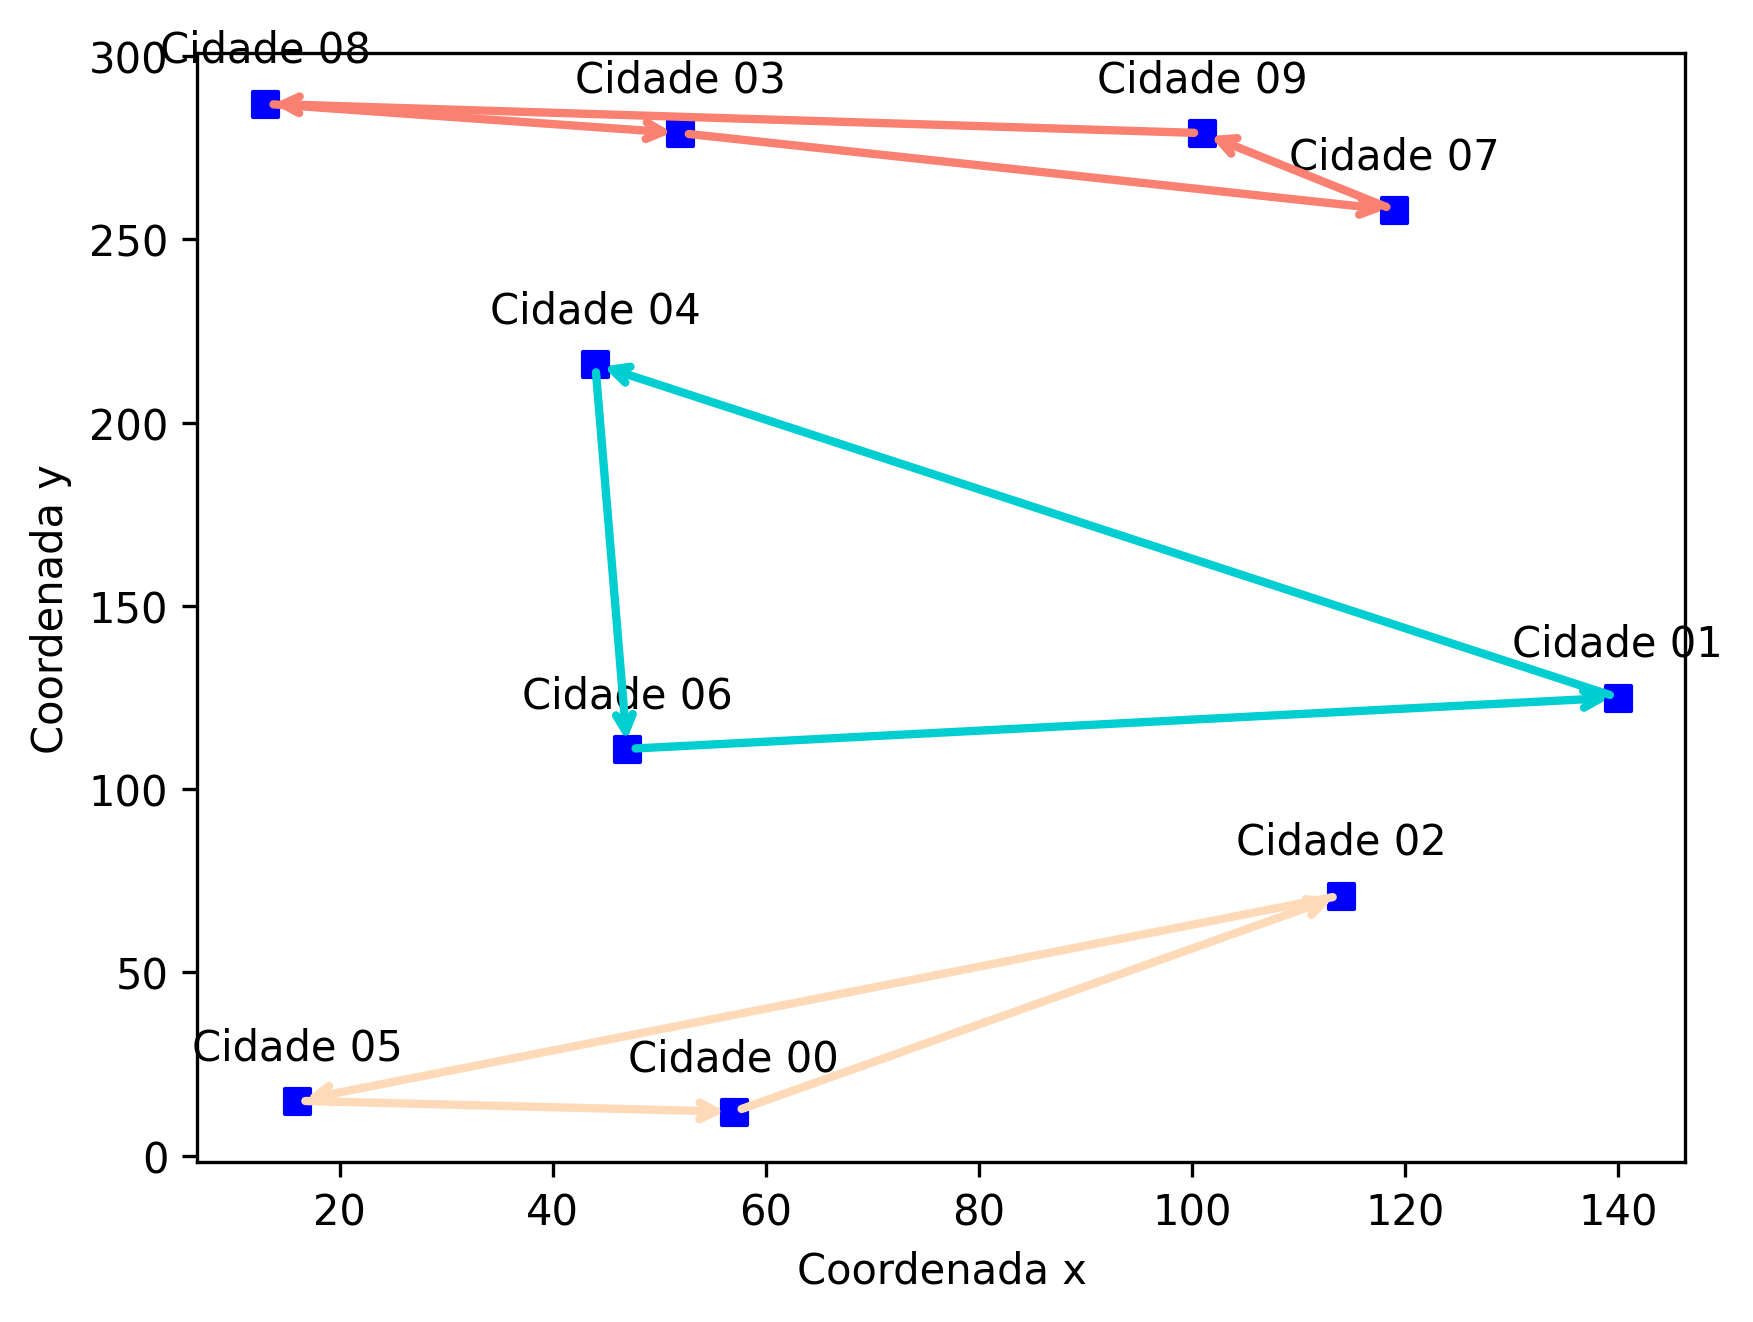

In [8]:
if NUM_CIDADES <= 10:
    fitness_otimo = float("inf")

    # testando todas as permutações possíveis
    for caminho in permutations(list(CIDADES.keys())):
        distancia_ = funcao_objetivo_multiplos_caixeiros(caminho, CIDADES, CAIXEIROS)
        if distancia_ < fitness_otimo:
            fitness_otimo = distancia_
            resposta_otima = caminho
            melhor_distancia = distancia_

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", melhor_distancia)
    print()

    plota_trajeto_multiplos_caixeiros(CIDADES, resposta_otima, CAIXEIROS)

Portanto, nosso algoritmo genético encontrou a melhor solução possível para o problema. Além disso, o fez consideravelmente mais rápido, em ~$2$ segundos contra os ~$30$ segundos da busca exaustiva (que para mais cidades aumenta rapidamente: com uma cidade a mais já passa de $3$ minutos). Uma coisa que pode acontecer, quando o problema tem várias soluções muito boas, é o algoritmo encontrar uma solução quase perfeita mas diferente da melhor solução. Nesse caso, isso não seria ruim, mas mantenha em mente que isso pode ocorrer.

Vamos ver como ele se comporta para o problema mais complicado de $8$ caixeiros em $40$ cidades:

In [16]:
CAIXEIROS = 8
NUM_CIDADES = 40

CIDADES = cria_cidades(NUM_CIDADES)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 20', 'Cidade 16', 'Cidade 31', 'Cidade 06', 'Cidade 37', 'Cidade 01', 'Cidade 26', 'Cidade 02', 'Cidade 07', 'Cidade 35', 'Cidade 34', 'Cidade 24', 'Cidade 36', 'Cidade 30', 'Cidade 03', 'Cidade 33', 'Cidade 15', 'Cidade 00', 'Cidade 13', 'Cidade 29', 'Cidade 28', 'Cidade 17', 'Cidade 32', 'Cidade 04', 'Cidade 25', 'Cidade 27', 'Cidade 23', 'Cidade 21', 'Cidade 05', 'Cidade 12', 'Cidade 11', 'Cidade 18', 'Cidade 14', 'Cidade 38', 'Cidade 10', 'Cidade 08', 'Cidade 22', 'Cidade 39', 'Cidade 09', 'Cidade 19'] com distância: 1923.2929973107352



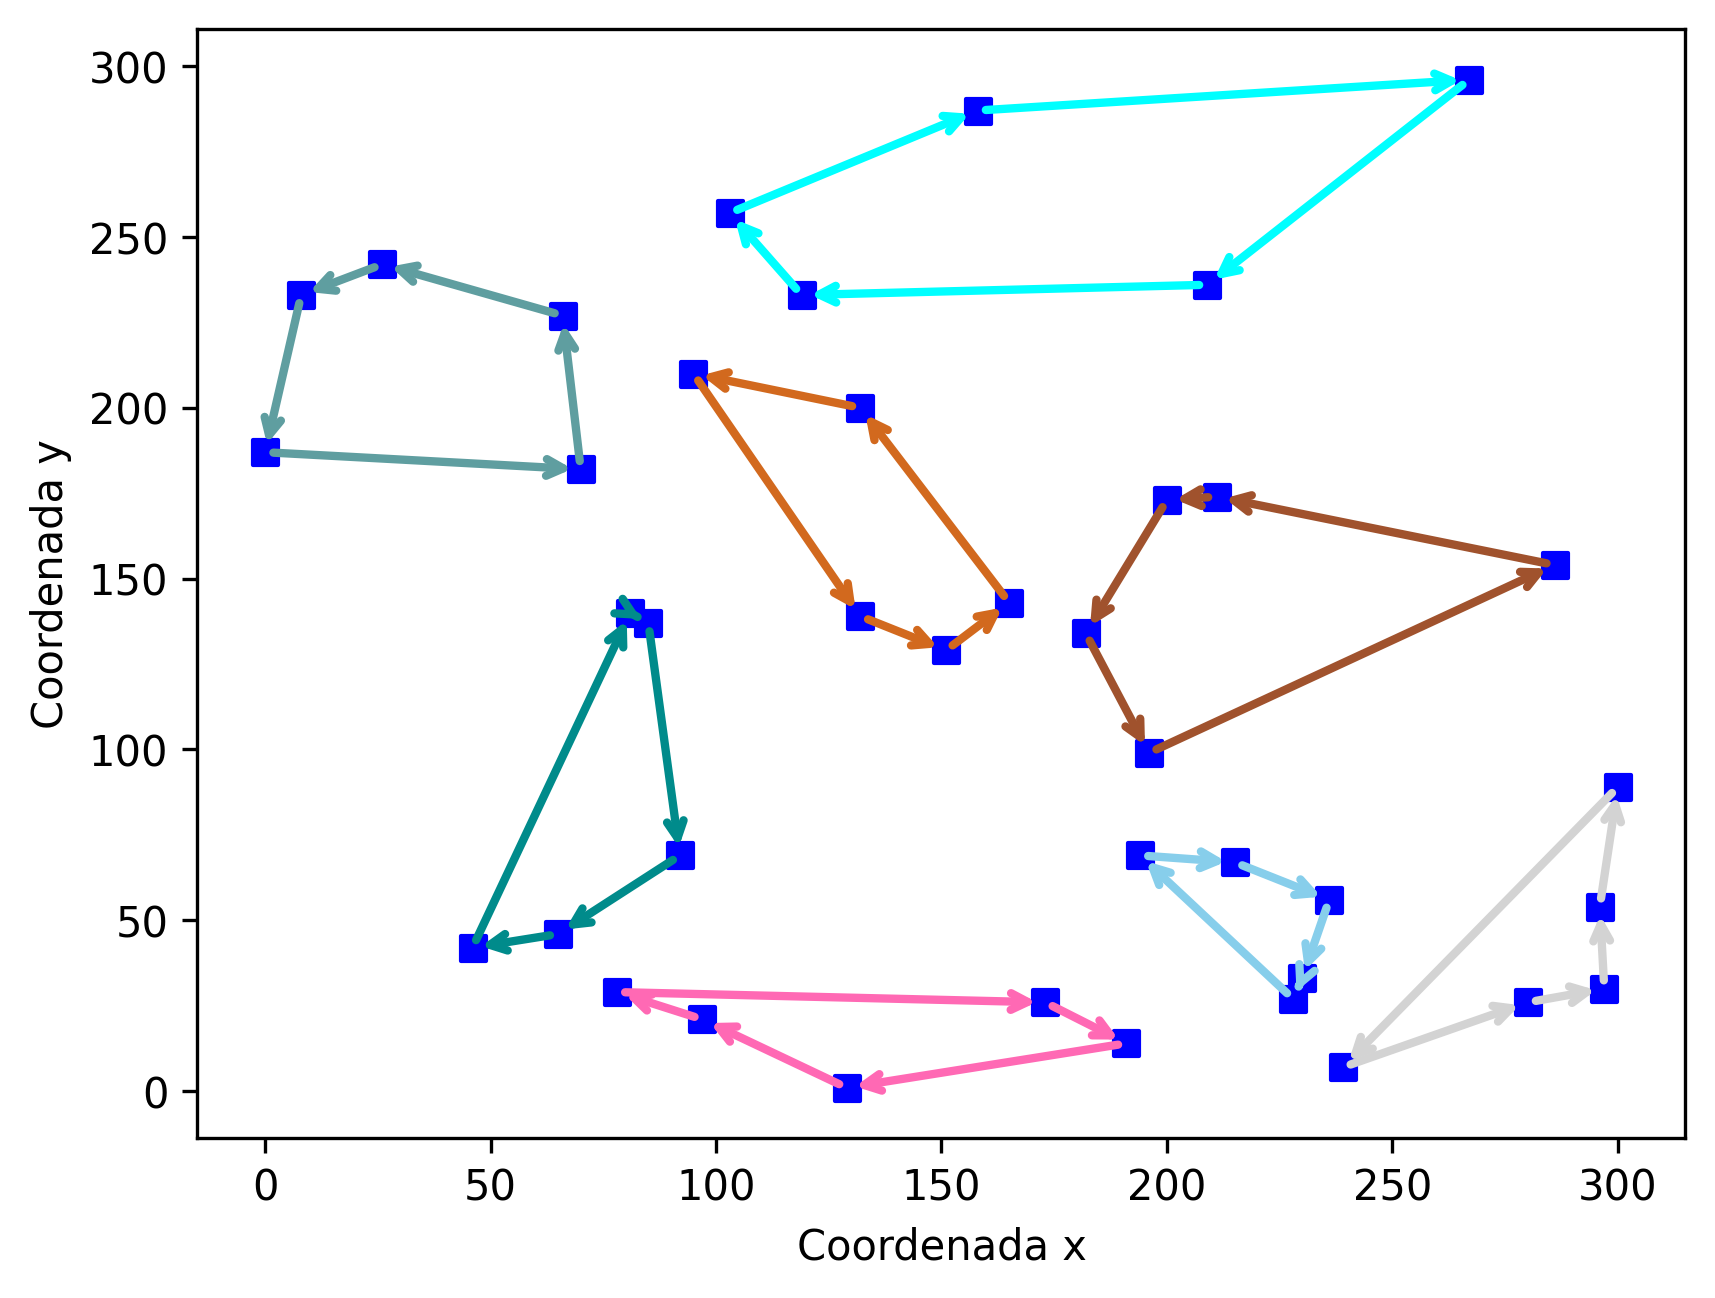

In [32]:
TAMANHO_POPULACAO = 100
NUM_GERACOES = 3000
CHANCE_DE_CRUZAMENTO = 0.3
CHANCE_DE_MUTACAO = 0.025
TAMANHO_TORNEIO = 5

populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
funcao_objetivo = partial(funcao_objetivo_pop_multiplos_caixeiros, cidades=CIDADES, n=CAIXEIROS)

hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_multiplos_caixeiros(melhor_individuo_observado, CIDADES, CAIXEIROS)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto_multiplos_caixeiros(CIDADES, melhor_individuo_observado, CAIXEIROS, nomes=False)

Não temos mais como fazer busca exaustiva para garantir esse resultado, porém parece ser uma opção razoável visto que segue o padrão que estávamos observando anteriormente, em que os caixeiros formam circuitos isolados. 

Há, ainda, uma outra possibilidade que não explorei aqui: caixeiros visitarem números diferentes de cidades (ex: caixeiro $1$ visita $3$ cidades, caixeiro $2$ visita $6$ cidades, caixeiro $3$ visita $2$ cidades etc.). Isso pode levar a um caminho menor ainda, mas não é uma obrigatoriedade do experimento (afinal, na analogia dos caixeiros viajantes, as empresas seriam bem capazes de definir uma meta comum de cidades a serem visitadas, de modo que um caixeiro não deixaria de fazer esse trajeto mesmo sendo mais longo para ele que seria para outro).

### Conclusão

O problema aqui enfrentado pode ser desenvolvido de maneira muito semelhante ao problema do caixeiro viajante original, apenas alterando a função objetivo para considerar que cada caixeiro passa por um conjunto diferente de cidades. Devem existir outros operadores que auxiliem nessa busca, mas pudemos encontrar um resultado bastante razoável com apenas essa mudança.

### Referências

[1] EYAL WIRSANSKY. Hands-On Genetic Algorithms with Python: Applying genetic algorithms to solve real-world deep learning and artificial intelligence problems, 2020. Chapter 4: Combinatorial Optimization, Solving the TSP.